***
# Connect surveys with (target) coordinates


Surveys provide method to associated `fieldid` with input coordinates. 

## Get a mock `Survey`

In [1]:
from skysurvey import example

In [2]:
mocksurvey = example.get_mocksurvey()

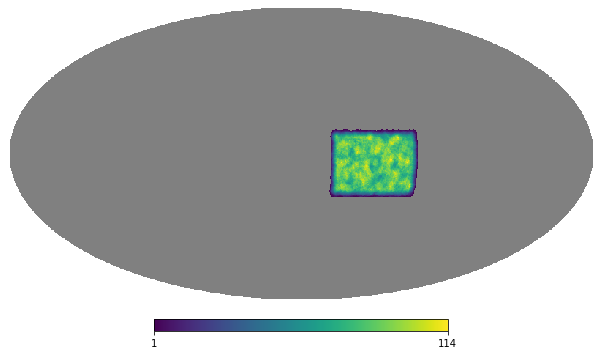

In [3]:
mocksurvey.show()

## Simulate random SNeIa in the sky

let's simulate 200_000 targets all across the sky

In [4]:
from skysurvey import tools
radec = tools.random_radec(200_000)

***
## `.radec_to_fieldid()`

`(grid)survey.radec_to_fieldid()` enables to quickly associate given coordinates (RA,Dec ; in degree) to given fields. 

### Associate them with the survey field system

have a `radec_to_fieldid()` method that will 

In [12]:
%%time
df = mocksurvey.radec_to_fieldid(radec)
df.head()

CPU times: user 16.2 ms, sys: 4.89 ms, total: 21.1 ms
Wall time: 19.9 ms


,fieldid
index_radec,
0,138072
1,27110
2,278271
3,378055
4,314875


- `index_radec` is the indice of the input radec target
- `fieldid` is the field index

It takes ~20ms to match 200_000 coordinates over 480 000 fields... (healpix)

and see how it looks

In [13]:
ntarget_per_fieldid = df.groupby("fieldid").size()

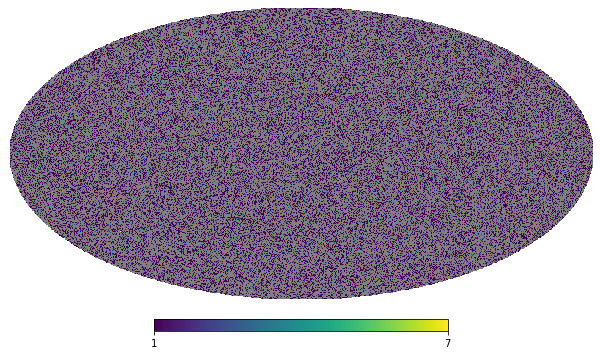

In [14]:
mocksurvey.show(data=ntarget_per_fieldid)

Here the full sky is covered as we did not specify we only want the field actually observed.

### limit this to actually observed fields

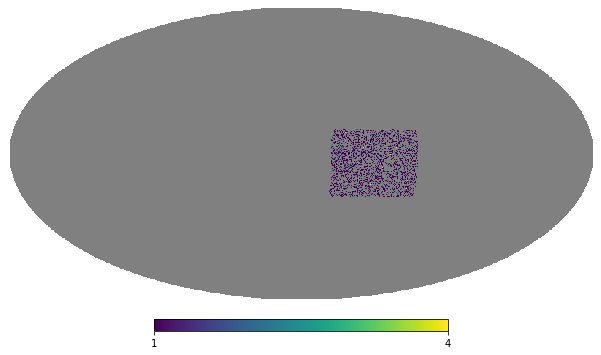

In [15]:
df = mocksurvey.radec_to_fieldid(radec, observed_fields=True)
ntarget_per_fieldid = df.groupby("fieldid").size()
mocksurvey.show(data=ntarget_per_fieldid)

***
## `.get_observations_from_coords()`

If you want to know the observation history of a specific coordinate, simply use the `.get_observations_from_coords()` method

In [18]:
mocksurvey.get_observations_from_coords([210, 0])

,ra,dec,gain,zp,skynoise,mjd,band,fieldid_survey,fieldid
495718,211.061249,-0.769805,1,30,226.793488,58911.605469,desr,6214,240333
495719,209.410675,1.725722,1,30,231.433777,58903.925781,desi,6091,240333
495720,208.641373,0.576491,1,30,189.859146,58910.363281,desg,7427,240333
495721,210.046066,0.009052,1,30,201.614456,58904.769531,desr,3795,240333
495722,209.482193,-0.788990,1,30,242.893402,58916.312500,desg,4577,240333
...,...,...,...,...,...,...,...,...,...
495777,211.030823,1.567923,1,30,202.992813,58921.652344,desr,5133,240333
495778,209.266479,-0.971145,1,30,197.614716,58902.687500,desr,4055,240333
495779,208.306366,0.827893,1,30,195.273972,58901.757812,desg,6571,240333
495780,210.770676,1.569153,1,30,164.698837,58908.742188,desr,4722,240333
